In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
sns.set_style('darkgrid') 
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
## we have load our dataset

In [3]:
data = pd.read_csv("C:/Users/Aslam Khan/Desktop/travel_data.csv")

In [4]:
df=data

In [5]:
df

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
0,06-01-2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,06-01-2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,04-01-2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
3,04-01-2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
4,03-01-2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,18-07-2011,08:09,Monday,GSK,54.52,125.6,49.9,82.4,7.89,65.5,39.7,No,NaN
201,14-07-2011,08:03,Thursday,GSK,50.90,123.7,76.2,95.1,7.89,40.1,32.1,Yes,NaN
202,13-07-2011,17:08,Wednesday,Home,51.96,132.6,57.5,76.7,NaN,54.2,40.6,Yes,NaN
203,12-07-2011,17:51,Tuesday,Home,53.28,125.8,61.6,87.6,NaN,51.9,36.5,Yes,NaN


In [6]:
  ### convert from strings to

In [7]:
df.tail()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
200,18-07-2011,08:09,Monday,GSK,54.52,125.6,49.9,82.4,7.89,65.5,39.7,No,NaN
201,14-07-2011,08:03,Thursday,GSK,50.90,123.7,76.2,95.1,7.89,40.1,32.1,Yes,NaN
202,13-07-2011,17:08,Wednesday,Home,51.96,132.6,57.5,76.7,NaN,54.2,40.6,Yes,NaN
203,12-07-2011,17:51,Tuesday,Home,53.28,125.8,61.6,87.6,NaN,51.9,36.5,Yes,NaN
204,11-07-2011,16:56,Monday,Home,51.73,125.0,62.8,92.5,NaN,49.5,33.6,Yes,NaN


In [8]:
### Exploratery data analysis

In [9]:
df.columns

Index(['Date', 'StartTime', 'DayOfWeek', 'GoingTo', 'Distance', 'MaxSpeed',
       'AvgSpeed', 'AvgMovingSpeed', 'FuelEconomy', 'TotalTime', 'MovingTime',
       'Take407All', 'Comments'],
      dtype='object')

In [10]:
tvl1= df[['Date','Distance']]
tvl1

,Date,Distance
0,06-01-2012,51.29
1,06-01-2012,51.63
2,04-01-2012,51.27
3,04-01-2012,49.17
4,03-01-2012,51.15
...,...,...
200,18-07-2011,54.52
201,14-07-2011,50.90
202,13-07-2011,51.96
203,12-07-2011,53.28


In [11]:
tvl1.dropna(inplace=True)

C:\Users\Aslam Khan\AppData\Local\Temp\ipykernel_6920\566880596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvl1.dropna(inplace=True)


In [12]:
tvl1 = df['Date'].to_frame()
tvl1

,Date
0,06-01-2012
1,06-01-2012
2,04-01-2012
3,04-01-2012
4,03-01-2012
...,...
200,18-07-2011
201,14-07-2011
202,13-07-2011
203,12-07-2011


In [13]:
### simple moving average

<AxesSubplot:>

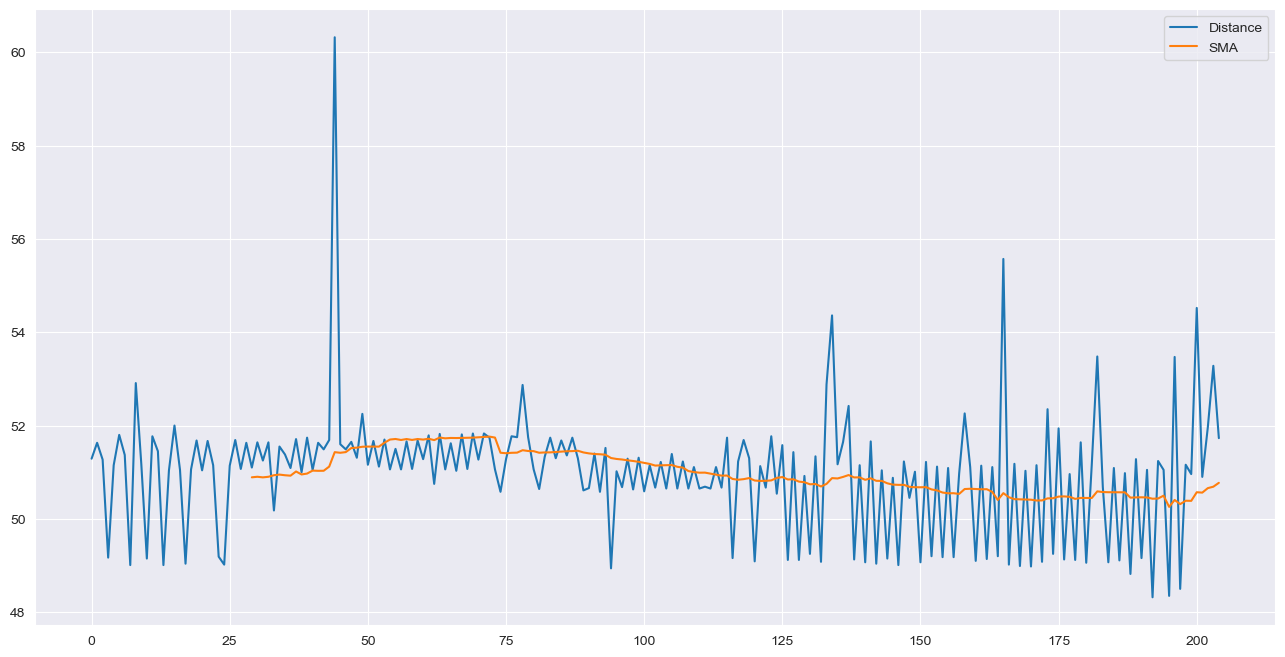

In [14]:
tvl1 = df['Distance'].to_frame()
tvl1['SMA']= df['Distance'].rolling(30).mean()
tvl1[['Distance','SMA']].plot(figsize=(16,8))#### visualize the plot

In [15]:
tvl1['SMA']= df['Distance'].rolling(30).mean()
tvl1

,Distance,SMA
0,51.29,NaN
1,51.63,NaN
2,51.27,NaN
3,49.17,NaN
4,51.15,NaN
...,...,...
200,54.52,50.571000
201,50.90,50.562667
202,51.96,50.658667
203,53.28,50.689667


In [16]:
tvl1.dropna(inplace= True)

In [17]:
tvl1.head()

,Distance,SMA
29,51.10,50.890667
30,51.64,50.902333
31,51.25,50.889667
32,51.64,50.902000
33,50.18,50.935667


<AxesSubplot:>

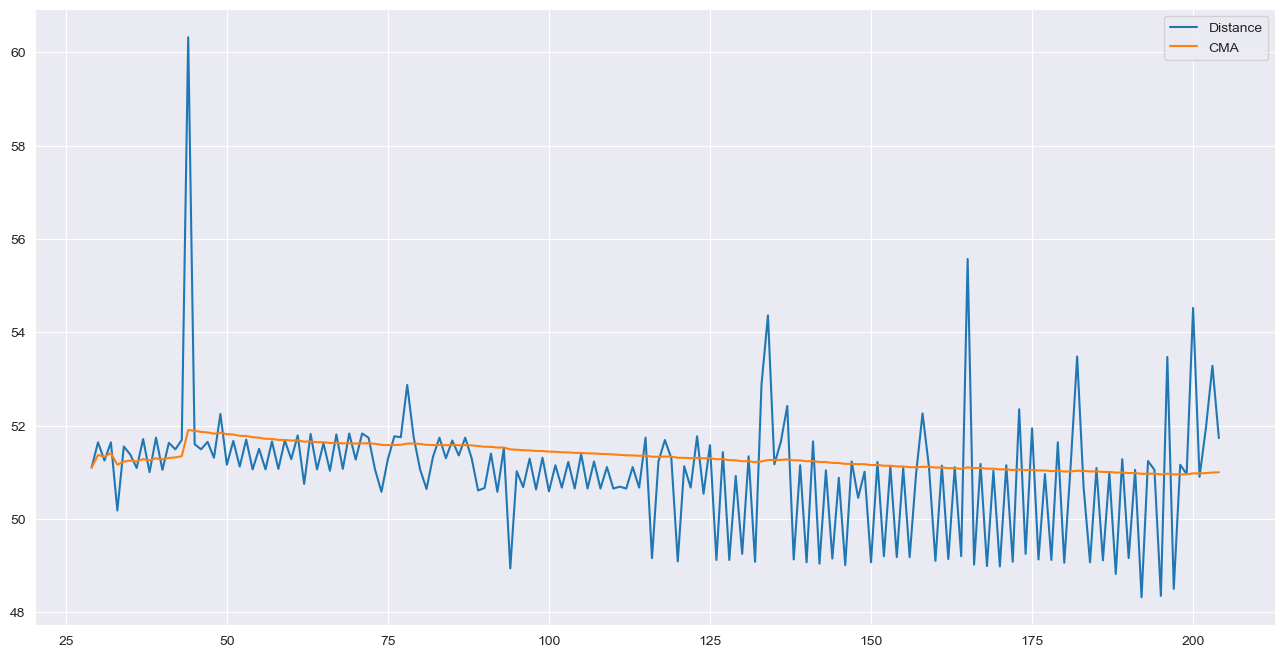

In [18]:
## cumulatiive moving average 
tvl2 = tvl1['Distance'].to_frame()
tvl2['CMA'] = tvl1['Distance'].expanding().mean()
tvl2[['Distance','CMA']].plot(figsize=(16,8))

<AxesSubplot:>

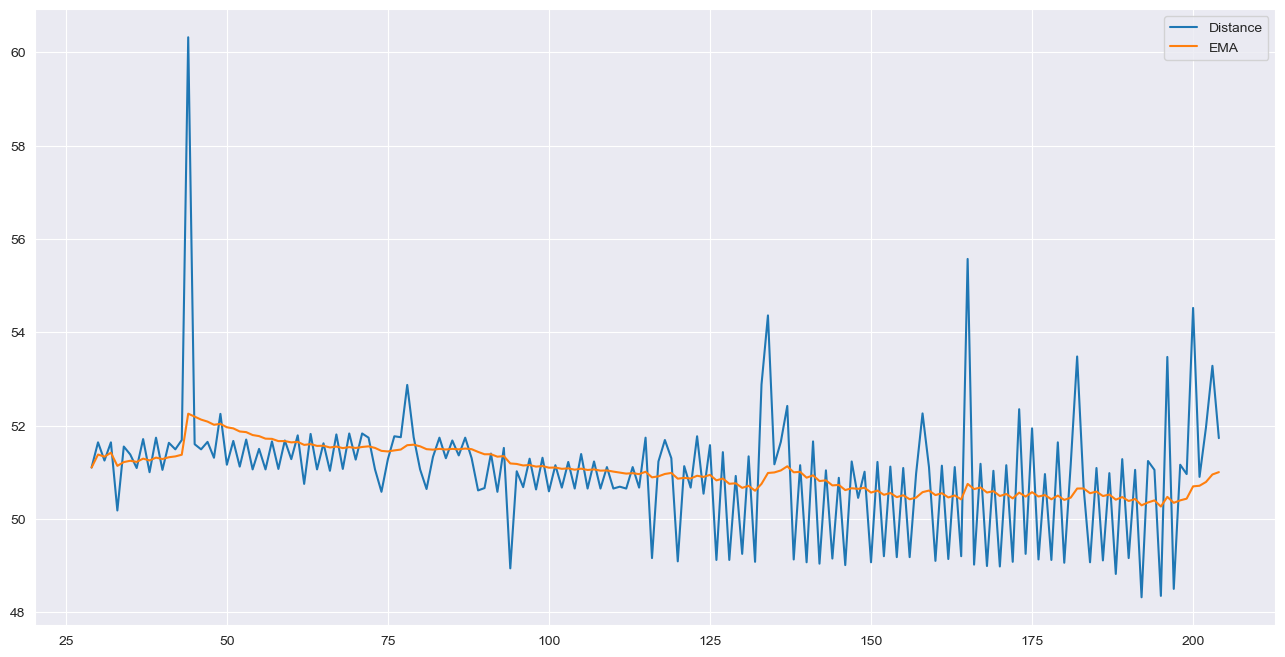

In [19]:
### Exponential moving avearge
tvl3 = tvl2['Distance'].to_frame()
tvl3['EMA'] = tvl2['Distance'].ewm(span=30).mean()
tvl3[['Distance','EMA']].plot(figsize=(16,8))

In [46]:
tvl1 =df['Date'].to_frame()
tvl1

,Date
0,06-01-2012
1,06-01-2012
2,04-01-2012
3,04-01-2012
4,03-01-2012
...,...
200,18-07-2011
201,14-07-2011
202,13-07-2011
203,12-07-2011


In [21]:
tvl1 =df['Distance'].to_frame()
tvl1

,Distance
0,51.29
1,51.63
2,51.27
3,49.17
4,51.15
...,...
200,54.52
201,50.90
202,51.96
203,53.28


In [22]:
###!pip install statsmodels

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
result = adfuller(tvl1['Distance'])
print('ADF statistic - ', result[0])
print('p-values - ', result[1])### if the value  is less than 0.05 , thayt means tha data
## ius stationery

ADF statistic -  -4.787403667320343
p-values -  5.7485185674697605e-05


<AxesSubplot:>

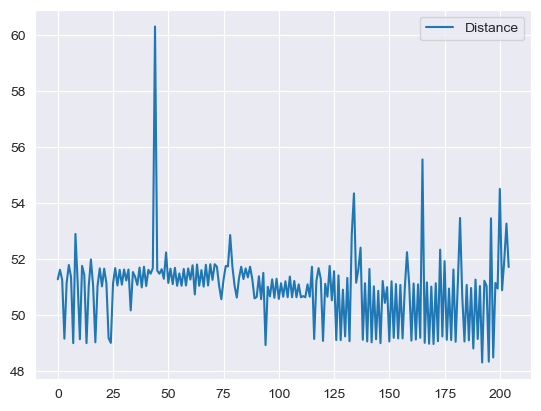

In [25]:
tvl1.plot()## visualize the plot

In [26]:
tvl1['Diff1']=tvl2['Distance']-tvl1['Distance'].shift()

In [27]:
tvl1['Diff1'].shift()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
200   -0.20
201    3.56
202   -3.62
203    1.06
204    1.32
Name: Diff1, Length: 205, dtype: float64

In [28]:
tvl1.dropna(inplace=True)
result = adfuller(tvl1['Distance'])

In [29]:
result

(-4.400731152166275,
 0.0002959494765875957,
 3,
 172,
 {'1%': -3.468952197801766,
  '5%': -2.878495056473015,
  '10%': -2.57580913601947},
 549.7458853022555)

In [30]:
result = adfuller(tvl1['Diff1'])
print('ADF statistic - ', result[0])
print('p-values - ', result[1])    ## if the po-value less than 0.05 tha means data is stattinory

ADF statistic -  -5.2377618760696265
p-values -  7.3584013305292585e-06


<AxesSubplot:>

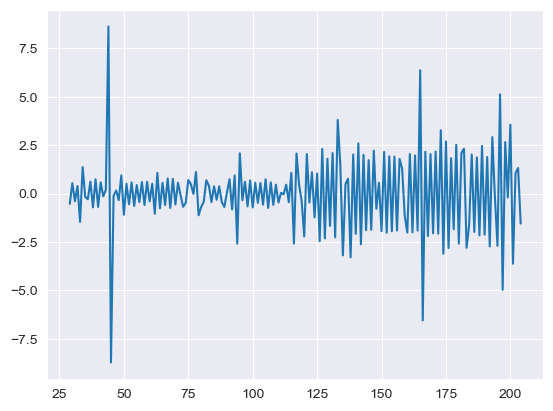

In [31]:
tvl1['Diff1'].plot()#### visulise the plot

In [32]:
### p and q values will be based on ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

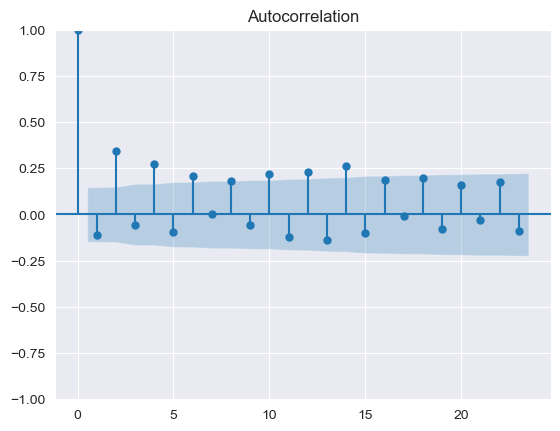

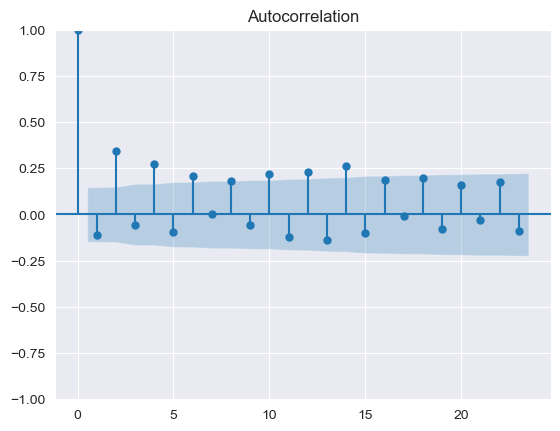

In [33]:
plot_acf(tvl1['Distance']) ### q values =1 

C:\Users\Aslam Khan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


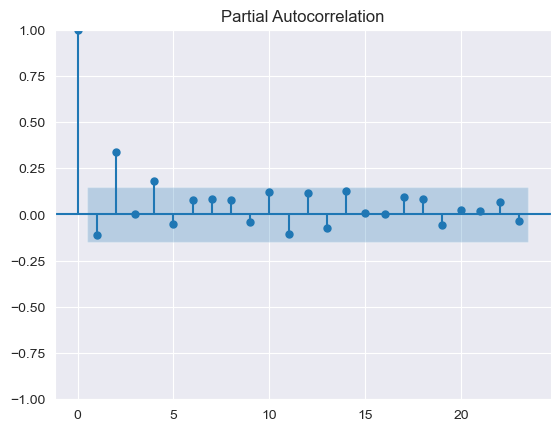

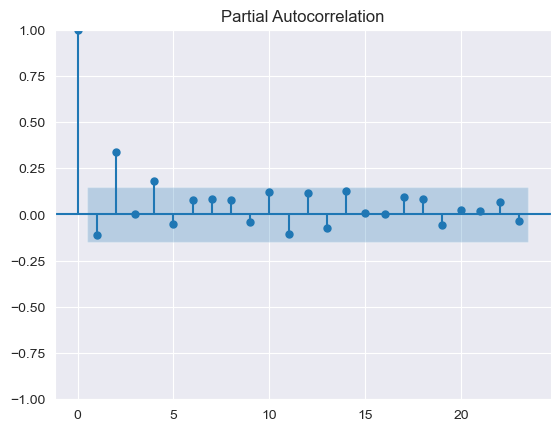

In [34]:
plot_pacf(tvl1['Distance'])### p = -1

In [35]:
### we have fit our model in ARIMA model

In [36]:
from statsmodels.tsa.arima.model import ARIMA

In [37]:
model = ARIMA(tvl1['Distance'],order= (1,1,1))
model_fit = model.fit()
model_fit.summary()

C:\Users\Aslam Khan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aslam Khan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aslam Khan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Distance   No. Observations:                  176
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -293.623
Date:                Fri, 21 Jul 2023   AIC                            593.245
Time:                        20:04:11   BIC                            602.739
Sample:                             0   HQIC                           597.096
                                - 176                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2677      0.080     -3.366      0.001      -0.424      -0.112
ma.L1         -0.8897      0.052    -17.244      0.000      -0.991      -0.789
sigma2         1.6586      0.064     25.947      0.000       1.533       1.784
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):              1684.99
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             2.69
Prob(H) (two-sided):                  0.43   Kurtosis:                        17.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

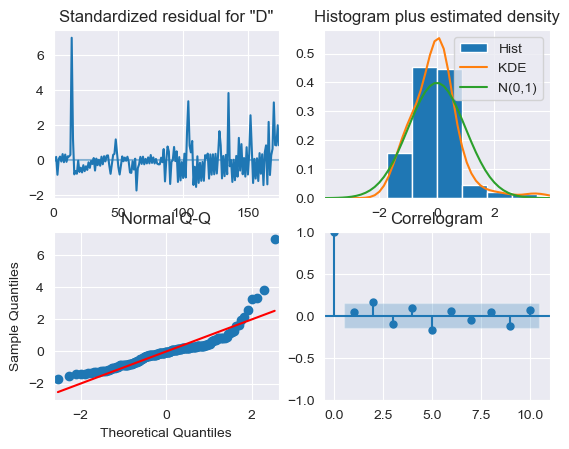

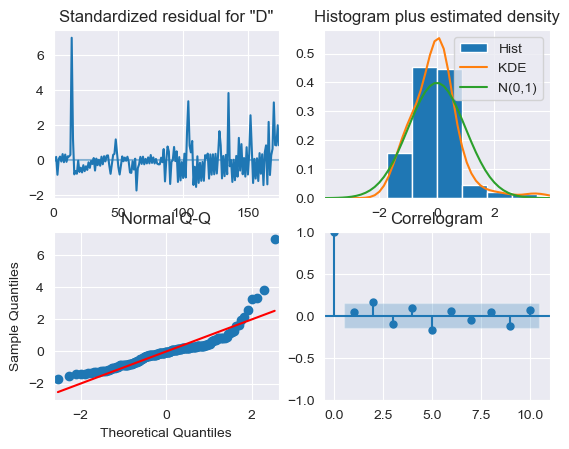

In [38]:
model_fit.plot_diagnostics()

In [42]:
model_fit = model_fit.resid

In [43]:
model_fit

29     51.100000
30      0.540131
31     -0.048739
32      0.256057
33     -1.173671
         ...    
200     4.234514
201     1.100436
202     1.070077
203     2.555800
204     1.077264
Length: 176, dtype: float64